Lets Grow More Virtual Internship
Beginner Level Task 2: 2)Stock Market Prediction and Forecasting Using Stacked LSTM

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("D:/Internship/Lets Grow More Internship/LGM Task 2/NSE-TATAGLOBAL.csv")

In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.shape

(2035, 8)

In [12]:
df.sort_values(by='Date',ignore_index=True, inplace=True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


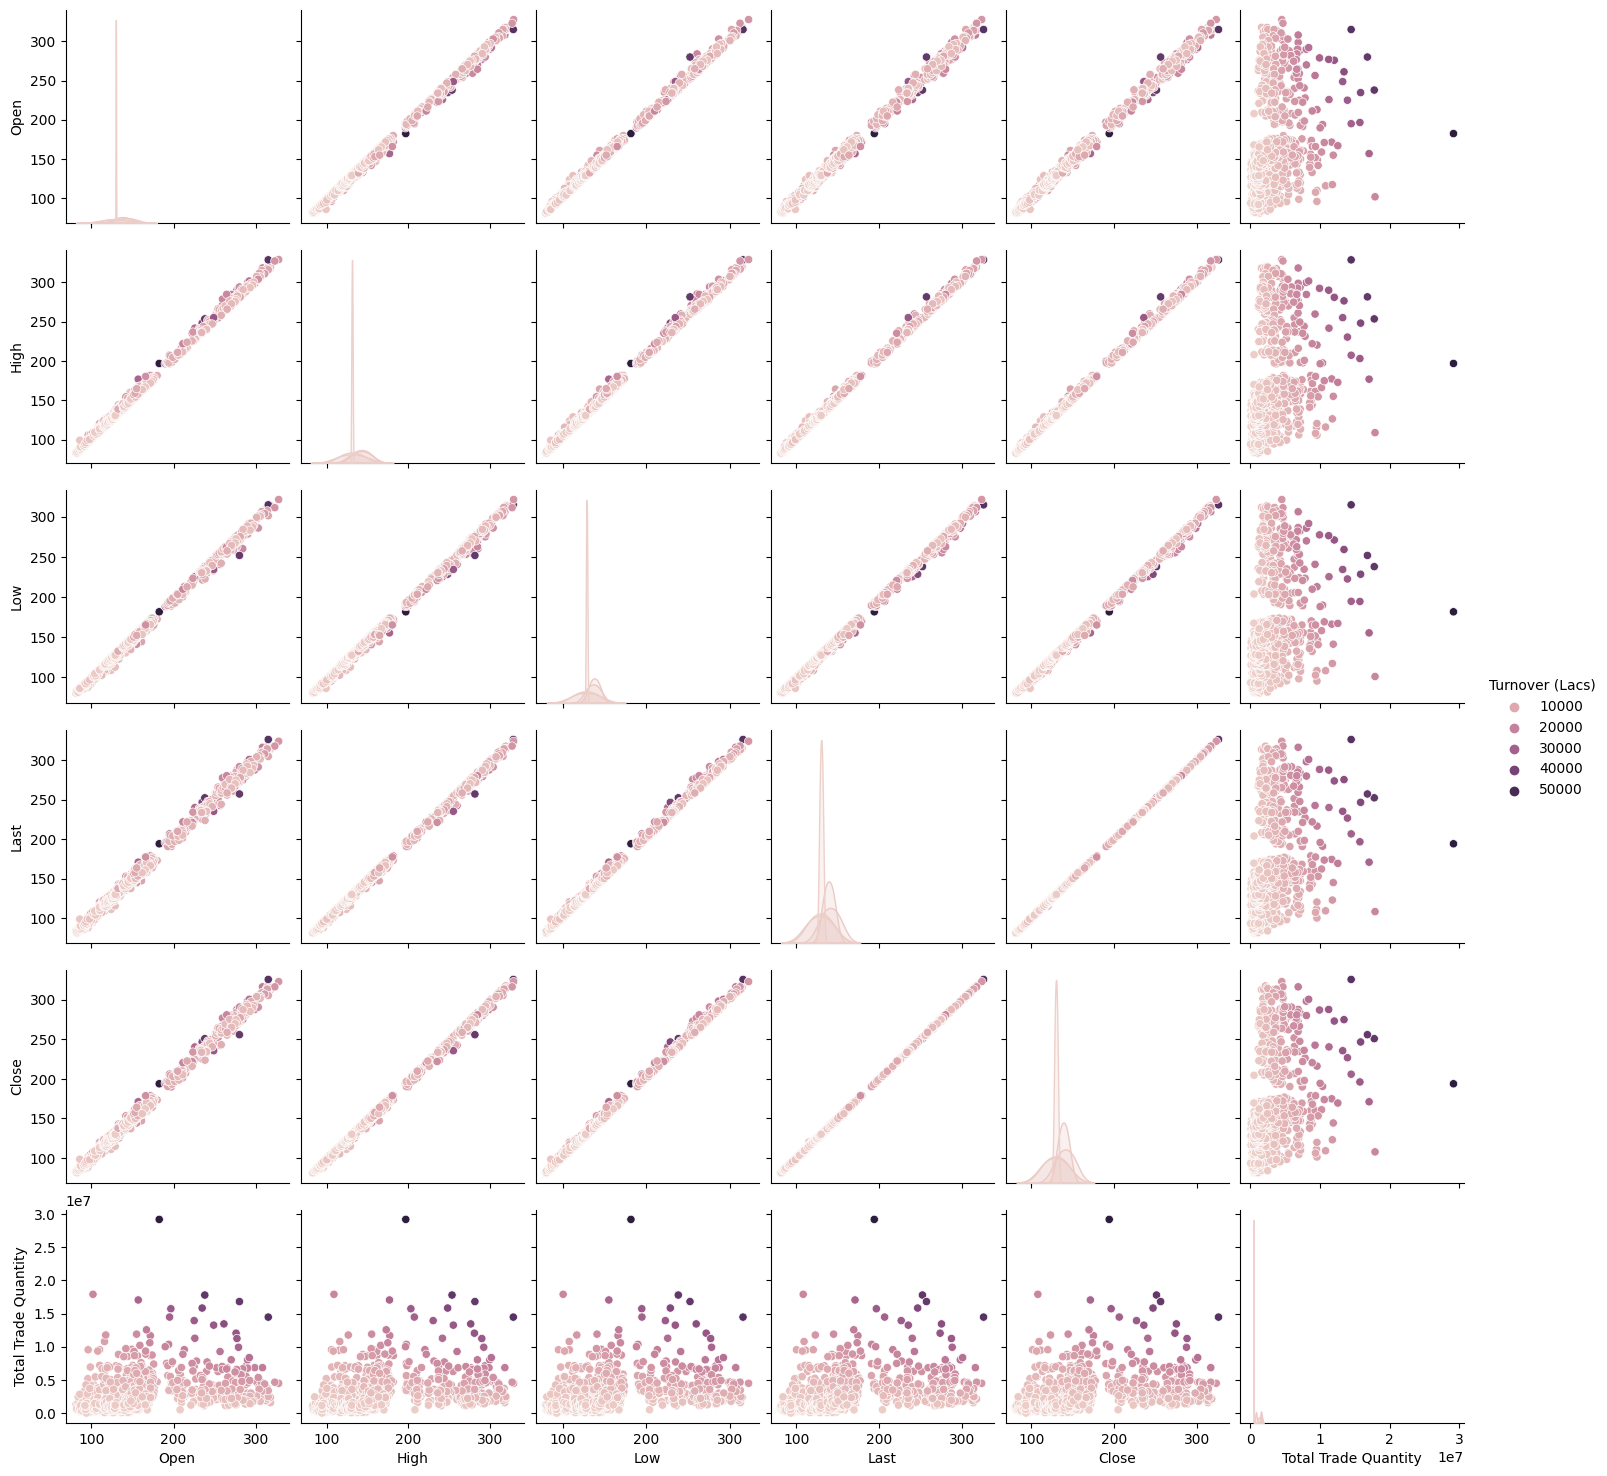

In [16]:
import seaborn as sns
sns.pairplot(df,hue="Turnover (Lacs)")

In [17]:
training_set = df.iloc[:, 1: 2].values

In [18]:
training_set

array([[122.1 ],
       [120.3 ],
       [121.8 ],
       ...,
       [240.  ],
       [234.55],
       [234.05]])

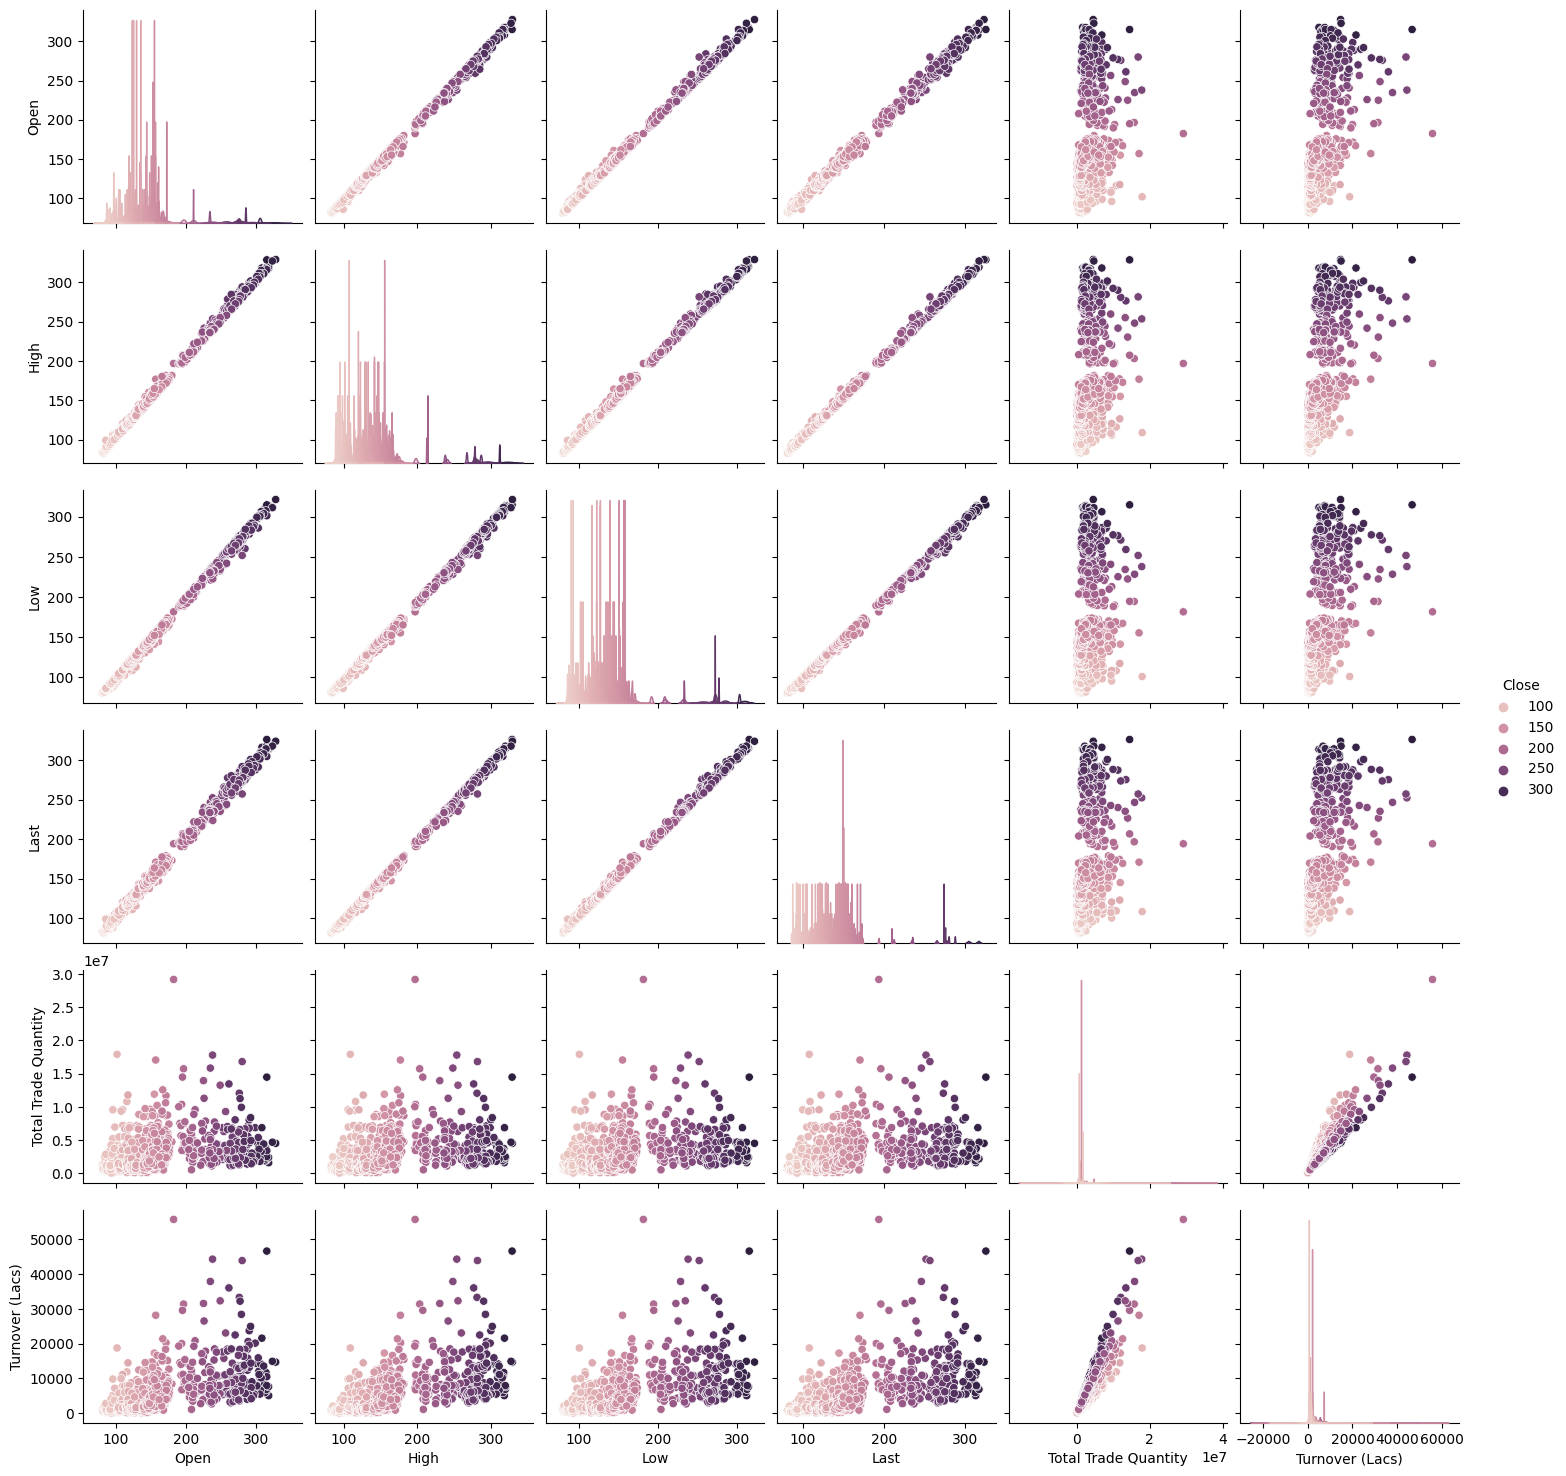

In [23]:
import seaborn as sns
sns.pairplot(df,hue="Close")

In [13]:
df_close=df.reset_index()['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

<AxesSubplot: >

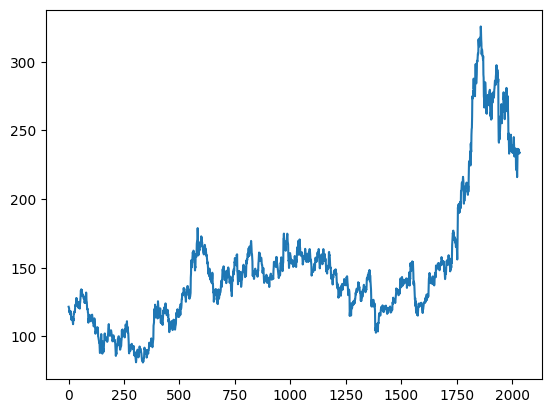

In [14]:
df_close.plot()